<a href="https://colab.research.google.com/github/plaban1981/Machine-Learning-8-TextProcessing/blob/master/Movie_review_classification_with_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import nltk
from nltk import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import os
import csv
from sklearn.preprocessing import LabelEncoder
import scikitplot
from sklearn.model_selection import RandomizedSearchCV

In [3]:
!pip install scikit-plot

In [5]:
nltk.download('movie_reviews')
movie_review_txt = movie_reviews.fileids()

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [0]:
header = ["Article","Review"]
count = 0
#include all the content of the movie_review corpus into a csv file with test as header Article and Moview _review
#as positive or negative reviews derived from first 3 charcters of the file name items[:3]
with open('Movie_review.csv', 'w', newline='') as f_output:
        csv_output = csv.writer(f_output)
        csv_output.writerow(header)
        files = []
        for items in movie_review_txt:
            f = movie_reviews.open(items)
            sent = f.readlines()
            csv_output.writerow([sent,items[:3]])
            f.close()
    

In [0]:
import pandas as pd
df_movie_reviews = pd.read_csv('Movie_review.csv')

In [8]:
df_movie_reviews.head()

,Article,Review
0,['plot : two teen couples go to a church party...,neg
1,"[""the happy bastard's quick movie review \n"", ...",neg
2,['it is movies like these that make a jaded mo...,neg
3,"[' "" quest for camelot "" is warner bros . \' f...",neg
4,"[""synopsis : a mentally unstable man undergoin...",neg


In [0]:
import re
def clean_str(string):
    
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [0]:
#clean the Article text 
df_movie_reviews= df_movie_reviews.copy()
df_movie_reviews['Clean_Text'] = df_movie_reviews['Article'].apply(lambda x : clean_str(x))

In [11]:
df_movie_reviews.head()

,Article,Review,Clean_Text
0,['plot : two teen couples go to a church party...,neg,plot two teen couples go to a church party dri...
1,"[""the happy bastard's quick movie review \n"", ...",neg,the happy bastard quick movie review n amn tha...
2,['it is movies like these that make a jaded mo...,neg,it is movies like these that make a jaded movi...
3,"[' "" quest for camelot "" is warner bros . \' f...",neg,quest for camelot is warner bros first feature...
4,"[""synopsis : a mentally unstable man undergoin...",neg,synopsis a mentally unstable man undergoing ps...


In [0]:
#### lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def lematize(string):
    words = []
    tokens = nltk.word_tokenize(string)
    for word in tokens:
        words.append(lemma.lemmatize(word))
    sentence = " ".join(words)
    return sentence

In [13]:
#### Testing the function lemma
nltk.download('punkt')
nltk.download('wordnet')
text = "Ink helps drive democracy in Asia"
lematize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'Ink help drive democracy in Asia'

In [0]:
#apply lemmatiztion to cleaned text
df_movie_reviews= df_movie_reviews.copy()
df_movie_reviews['Lemmatized_Text'] = df_movie_reviews['Clean_Text'].apply(lambda x : lematize(x))

In [15]:
df_movie_reviews.head()

,Article,Review,Clean_Text,Lemmatized_Text
0,['plot : two teen couples go to a church party...,neg,plot two teen couples go to a church party dri...,plot two teen couple go to a church party drin...
1,"[""the happy bastard's quick movie review \n"", ...",neg,the happy bastard quick movie review n amn tha...,the happy bastard quick movie review n amn tha...
2,['it is movies like these that make a jaded mo...,neg,it is movies like these that make a jaded movi...,it is movie like these that make a jaded movie...
3,"[' "" quest for camelot "" is warner bros . \' f...",neg,quest for camelot is warner bros first feature...,quest for camelot is warner bros first feature...
4,"[""synopsis : a mentally unstable man undergoin...",neg,synopsis a mentally unstable man undergoing ps...,synopsis a mentally unstable man undergoing ps...


In [0]:
#label encoding 
label_encode = LabelEncoder()
encode_review = label_encode.fit_transform(df_movie_reviews['Review'])

In [17]:
from collections import Counter
Counter(encode_review)

Counter({0: 1000, 1: 1000})

In [18]:
df_movie_reviews['Review_Encode'] = encode_review
df_movie_reviews.head()

,Article,Review,Clean_Text,Lemmatized_Text,Review_Encode
0,['plot : two teen couples go to a church party...,neg,plot two teen couples go to a church party dri...,plot two teen couple go to a church party drin...,0
1,"[""the happy bastard's quick movie review \n"", ...",neg,the happy bastard quick movie review n amn tha...,the happy bastard quick movie review n amn tha...,0
2,['it is movies like these that make a jaded mo...,neg,it is movies like these that make a jaded movi...,it is movie like these that make a jaded movie...,0
3,"[' "" quest for camelot "" is warner bros . \' f...",neg,quest for camelot is warner bros first feature...,quest for camelot is warner bros first feature...,0
4,"[""synopsis : a mentally unstable man undergoin...",neg,synopsis a mentally unstable man undergoing ps...,synopsis a mentally unstable man undergoing ps...,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = df_movie_reviews['Lemmatized_Text'].values
vect1 = TfidfVectorizer(stop_words='english',min_df=2)
X = vect1.fit_transform(x)

In [0]:
X_names = vect1.get_feature_names()

In [0]:
df_tfidf = pd.DataFrame(X.toarray(),columns=X_names)

In [22]:
df_tfidf.head()

,aa,aaa,aaliyah,aardman,aaron,ab,aback,abandon,abandoned,abandoning,...,zoologist,zoom,zooming,zoot,zorg,zorro,zucker,zuko,zwick,zwigoff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_tfidf.shape

(2000, 21164)

In [0]:
y = df_movie_reviews['Review_Encode'].values
x = X.toarray()

In [25]:
X.shape,y.shape

((2000, 21164), (2000,))

In [0]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 21164)
(1600,)
(400, 21164)
(400,)


**BUILD MODEL**

In [28]:
#random forest classifier base model
rf = RandomForestClassifier(n_estimators=100,n_jobs=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

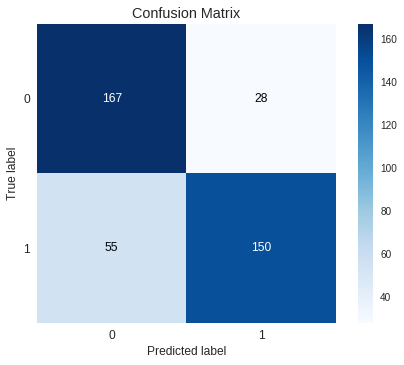

In [30]:
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

In [31]:
print("Prediction Accuracy : ",accuracy_score(y_test,y_pred)*100,'%')

Prediction Accuracy :  79.25 %


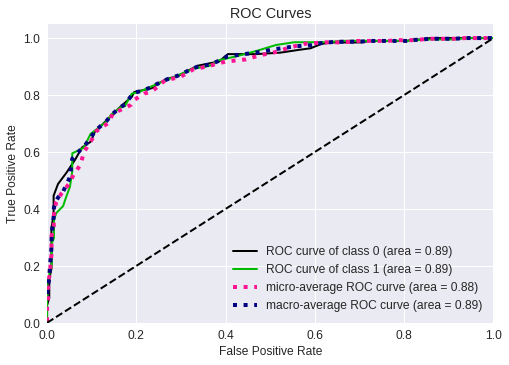

In [32]:
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

**Hyperparameter Tuning using Random Hyperparameter Grid**

In [33]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,verbose=2)

In [37]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  53.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.8s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  50.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  52.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  17.1s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  17.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=600, m

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 23.5min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [38]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [39]:
optimum_rf = RandomForestClassifier(n_estimators =1200,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=20,bootstrap=False)
optimum_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
opt_pred = optimum_rf.predict(X_test)
opt_pred_proba = optimum_rf.predict_proba(X_test)

In [41]:
print("Accuracy score after hyper parameter tuning : ",accuracy_score(y_test,opt_pred)*100,"%")

Accuracy score after hyper parameter tuning :  80.5 %


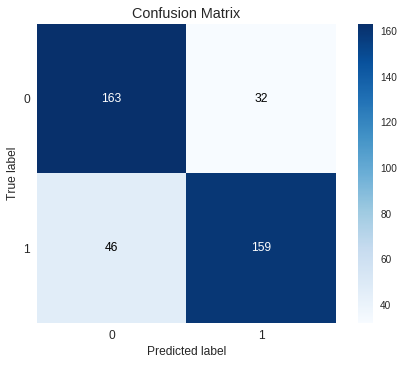

In [42]:
scikitplot.metrics.plot_confusion_matrix(y_test,opt_pred)

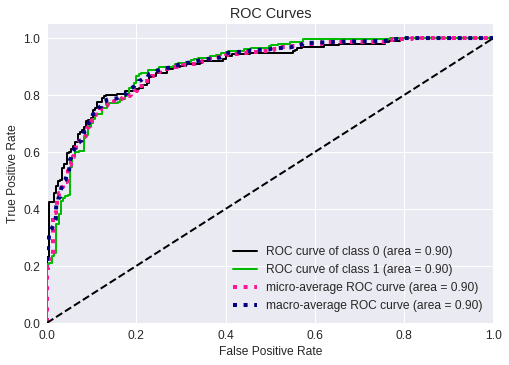

In [43]:
scikitplot.metrics.plot_roc(y_test,opt_pred_proba)

**Grid Search with Cross Validation**

*Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:*

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [20,40,60],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [800, 1000,1200,1400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=800 
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=800 
[CV]  bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=800, total=   3.4s
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=800 
[CV]  bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=800, total=   4.8s
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=800, total=   3.6s
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=1000 
[C

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min


[CV]  bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=800, total=   3.1s
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=800, total=   2.9s
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.4s
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.8s
[CV] bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 
[CV]  bootstrap=False, max_depth=20, max_featu

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.3min


[CV]  bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   4.7s
[CV] bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   5.3s
[CV] bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   5.6s
[CV] bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   5.7s
[CV] bootstrap=False, max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=1200 
[CV]  bootstrap=False, max_depth=20, 

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.0min


[CV]  bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=800, total=   2.7s
[CV] bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=800, total=   3.3s
[CV] bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   3.3s
[CV] bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   3.6s
[CV] bootstrap=False, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 
[CV]  bootstrap=False, max_depth=40, max_featu

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 27.2min


[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   4.2s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.6s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.8s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=800, total=   2.6s
[CV] bootstrap=False, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_f

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 36.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False], 'max_depth': [20, 40, 60], 'max_features': [2, 3], 'min_samples_leaf': [2, 3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [800, 1000, 1200, 1400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [50]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [57]:
grid_rf = RandomForestClassifier(n_estimators =1200,min_samples_split=8,min_samples_leaf=2,max_features=8,max_depth=100,bootstrap=False)
grid_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
predictions = grid_rf.predict(X_test)
pred_proba = grid_rf.predict_proba(X_test)

In [59]:
print("Accuracy score after hyper parameter tuning - grid search : ",accuracy_score(y_test,predictions)*100,"%")

Accuracy score after hyper parameter tuning - grid search :  80.0 %
